# Plotting data with matplotlib

### Import packages that will be needed later

In [1]:
import sys
import numpy as np
import random as rand 
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.cm as cm

In [2]:
%matplotlib inline

### Create data sets

In [3]:
x = range(5,100,5)
y = [i**2 for i in x]
z = [100*i for i in x]
rv1 = [rand.random() for i in range(1000)]
rv2 = [rand.random() for i in range(10000)]

## A basic plot

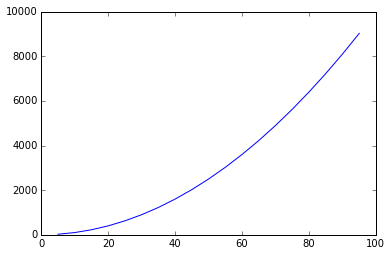

In [4]:
fig = plt.figure( figsize = (6, 4) )
sub1 = fig.add_subplot(1,1,1)

# Add data set
sub1.plot(x, y)

plt.show()

### Adding axes labels and legend for good record keeping

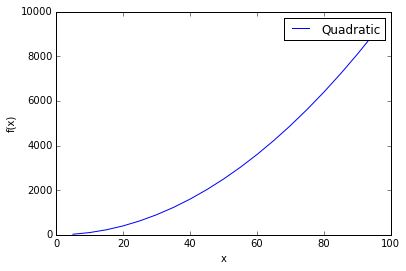

In [5]:
fig = plt.figure( figsize = (6, 4) )
sub1 = fig.add_subplot(1,1,1)

# Add data set and label
sub1.plot(x, y, label = "Quadratic")

# Format and label axes
sub1.set_xlabel("x")
sub1.set_ylabel("f(x)")

# Display legend
sub1.legend()

plt.show()

### Ok, we covered all the basics, but the figure looks like crap.  How do we make it visually appealing?

## Full frame, log-log plot

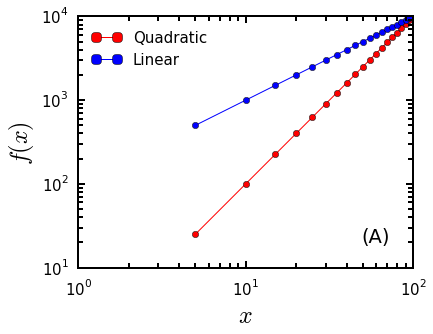

In [11]:
fig = plt.figure( figsize = (6, 4.5) )
sub1 = fig.add_subplot(1,1,1)

# Set baseline font size
font_size = 15

# Format graph frame and tick marks
sub1.tick_params(axis = 'both', which = 'major', length = 7, width = 2, labelsize = font_size, 
                 direction = 'in', pad = 10)
sub1.tick_params(axis = 'both', which = 'minor', length = 5, width = 2, labelsize = 10, direction = 'in')

for axis in ['bottom', 'left', 'top', 'right']:
    sub1.spines[axis].set_linewidth(2)

# Add and format data sets
sub1.plot(x, y, "ro-", label = "Quadratic")
sub1.plot(x, z, "bo-", label = "Linear")

# Format axes 
axis_label = 25
sub1.set_xlabel("$x$", fontsize = 1.6 * font_size)
sub1.set_ylabel("$f(x)$", fontsize = 1.6 * font_size)
sub1.set_yscale("log")
sub1.set_xscale("log")

# Add and format legend and add necessary text
sub1.legend(loc = "best", frameon = False, markerscale = 1.8, fontsize = font_size)
sub1.text(50, 20, "(A)", fontsize = 1.3 * font_size )

plt.show()

## Partial frame with axis padding

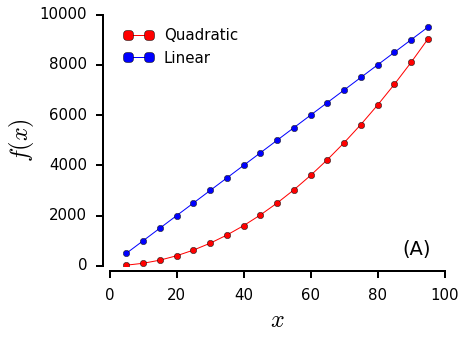

In [12]:
fig = plt.figure( figsize = (6, 4.5) )
sub1 = fig.add_subplot(1,1,1)

# Set baseline font size
font_size = 15

# Format graph frame and tick marks
sub1.yaxis.set_ticks_position('left')
sub1.xaxis.set_ticks_position('bottom')
sub1.tick_params(axis = 'both', which = 'major', length = 7, width = 2, direction = 'out', 
                 pad = 10, labelsize = font_size)
sub1.tick_params(axis = 'both', which = 'minor', length = 5, width = 2, direction = 'out', 
                labelsize = 0.6 * font_size)
for axis in ['bottom','left']:
    sub1.spines[axis].set_linewidth(2)
    sub1.spines[axis].set_position(("axes", -0.02))
for axis in ['top','right']:
    sub1.spines[axis].set_visible(False)


# Add and format data sets
sub1.plot(x, y, "ro-", label = "Quadratic")
sub1.plot(x, z, "bo-", label = "Linear")

# Format axes 
sub1.set_xlabel("$x$", fontsize = 1.6 * font_size)
sub1.set_ylabel("$f(x)$", fontsize = 1.6 * font_size)

# Format legend
sub1.legend(loc = "best", frameon = False, markerscale = 1.8, fontsize = font_size)
sub1.text(88, 450, "(A)", fontsize = 1.3 * font_size)

plt.show()

## Basic histogram

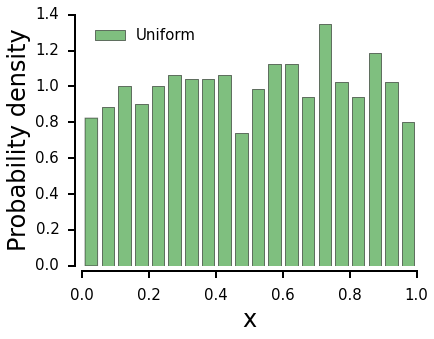

In [8]:
fig = plt.figure( figsize = (6, 4.5) )
sub1 = fig.add_subplot(1,1,1)

# Set baseline font size
font_size = 15

# Format graph frame and tick marks
sub1.yaxis.set_ticks_position('left')
sub1.xaxis.set_ticks_position('bottom')
sub1.tick_params(axis = 'both', which = 'major', length = 7, width = 2, direction = 'out', 
                 pad = 10, labelsize = font_size)
sub1.tick_params(axis = 'both', which = 'minor', length = 5, width = 2, direction = 'out', 
                 labelsize = 0.6 * font_size)
for axis in ['bottom','left']:
    sub1.spines[axis].set_linewidth(2)
    sub1.spines[axis].set_position(("axes", -0.02))
for axis in ['top','right']:
    sub1.spines[axis].set_visible(False)

# Calculate and plot histogram
n, bins, patches = sub1.hist(rv1, 20, normed = 1, rwidth = 0.75, color = "g", alpha = 0.5, histtype = "bar",
                             label = "Uniform", cumulative = False)

# Format axes 
sub1.set_xlabel("x", fontsize = 1.6 * font_size)
sub1.set_ylabel("Probability density", fontsize = 1.6 * font_size)

# Format legend
sub1.legend(loc = "best", frameon = False, markerscale = 1.8, fontsize = font_size)


plt.show()

# Check for more details: http://matplotlib.org/1.3.1/examples/pylab_examples/histogram_demo_extended.html

## Histograms of two data sets

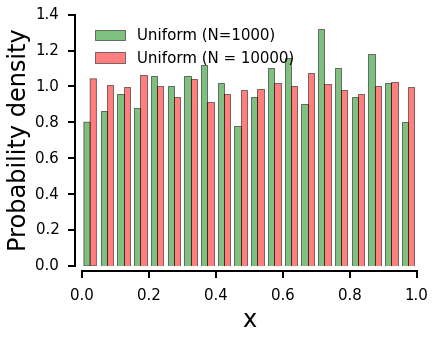

In [13]:
fig = plt.figure( figsize = (6, 4.5) )
sub1 = fig.add_subplot(1,1,1)

# Set baseline font size
font_size = 15

# Format graph frame and tick marks
sub1.yaxis.set_ticks_position('left')
sub1.xaxis.set_ticks_position('bottom')
sub1.tick_params(axis = 'both', which = 'major', length = 7, width = 2, direction = 'out', 
                 pad = 10, labelsize = font_size)
sub1.tick_params(axis = 'both', which = 'minor', length = 5, width = 2, direction = 'out', 
                 labelsize = 0.6 * font_size)
for axis in ['bottom','left']:
    sub1.spines[axis].set_linewidth(2)
    sub1.spines[axis].set_position(("axes", -0.02))
for axis in ['top','right']:
    sub1.spines[axis].set_visible(False)

# Calculate and plot histogram
n1, bins1, patches1 = sub1.hist([rv1, rv2], 20, normed = 1, rwidth = 0.75, color = ["g", "r"], alpha = 0.5, 
                                label = ["Uniform (N=1000)", "Uniform (N = 10000)"], cumulative = False)

# Format axes 
sub1.set_xlabel("x", fontsize = 1.6 * font_size)
sub1.set_ylabel("Probability density", fontsize = 1.6 * font_size)

# Format legend
sub1.legend(loc = "best", frameon = False, markerscale = 1.8, fontsize = font_size)


plt.show()


## 2D density plots

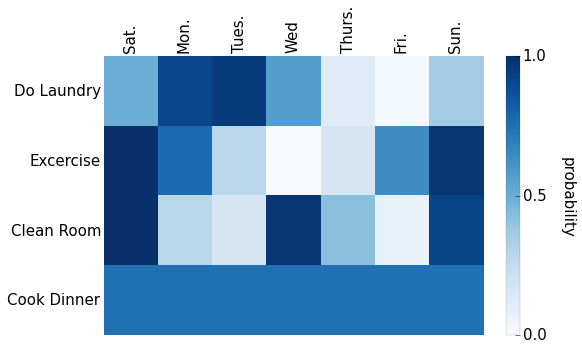

In [14]:
# Make some fake data
row_labels = ['Do Laundry', 'Excercise', 'Clean Room', 'Cook Dinner']
column_labels = ['Sat.', 'Mon.', 'Tues.', 'Wed', 'Thurs.', 'Fri.', 'Sun.']
# make a 4x7 np.array
data = np.array([np.sin(range(7)) + 1, 
                 np.cos(range(7)) + 1,
                 np.cos(range(0, 14, 2)) + 1,
                 np.ones(7) + 0.5]) / 2.0

# ---- Start Makeing Figure ----

fig = plt.figure(figsize=(8, 5))
ax = plt.subplot(111)

heatmap = ax.pcolormesh(data,
                  
              ## --- Colors! --- 
              ## specify color-map (ie. a color scheme)
              cmap=cm.Blues, # standard colormap
              
              ## To use log-scale for coloring patches, uncomment next line:
              #norm=mpl.colors.LogNorm(vmin=data.min(), vmax=data.max()),
              ## find other scaling options from: 
              ## http://matplotlib.org/api/colors_api.html
              
              
              ## specify the min and max values for coloring.
              vmin=0.0, 
              vmax=1.0,
                                      
              ## --- cell borders  --- 
              #edgecolors='black', # color of lines between cells.
              #linewidths=0.05,     # width of lines between cells.
             )

### Labels ! ###

# adds row and column labels
ax.set_xticklabels(column_labels, minor=False)
ax.set_yticklabels(row_labels, minor=False)

# put the labels (called major ticks) at the middle of each cell
ax.set_xticks(np.arange(data.shape[1])+0.5, minor=False)
ax.set_yticks(np.arange(data.shape[0])+0.5, minor=False)

# pick which sides for which you want labels
ax.tick_params(labelbottom='off', labeltop='on', 
               labelleft='on', labelright='off',
               labelsize=15 # size of 
              )

# If the xtick labels are long, rotate them
plt.xticks(rotation=90) # set rotation using degrees.


### Other Asthectics ###

# flips the order of elements on y axis
ax.invert_yaxis()  

ax.set_frame_on(False) # turns off the boarder
ax.grid(False) # turn off any grid lines


# remove the axis ticks while keeping the labels
for t in ax.xaxis.get_major_ticks():
    t.tick1On = False
    t.tick2On = False
for t in ax.yaxis.get_major_ticks():
    t.tick1On = False
    t.tick2On = False
    
## ---  Colorbar Options ---
# create the colorbar
cbar = plt.colorbar(heatmap, #the heatmap
                    orientation= 'vertical', # or 'horizontal', 
                    # fraction of main axis to use for colorbar 
                    fraction=0.1, 
                    pad=0.05, # distance from main plot
                   )

# Tick parameters for colorbar
cbar.set_ticks([0.0, 0.5, 1.0])
#cbar.set_ticklabels(['low', 'mid', 'high'])
cbar.ax.tick_params(size=5, labelsize=15)

# Label for the colorbar
cbar.set_label('probability', 
               rotation=270, # label orientation
               labelpad=30, # label distance from bar
               size=15, # size of text
              )

# make boarderline much fainter
cbar.outline.set_linewidth(0.1) 
plt.show()

# 3-dimensions

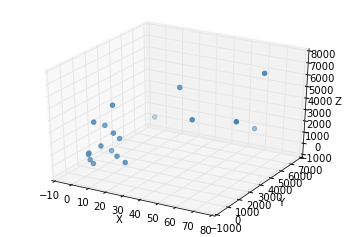

In [15]:
#We have to import an additional package to use 3D plotting
from mpl_toolkits.mplot3d import Axes3D

#We start the figure and when we add a subplot we must tell it to project it in 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

#This is just a simple scatter of dots in 3 dimensions
ax.scatter([i * rand.random() for i in x], \
           [i * rand.random() for i in y], \
           [i * rand.random() for i in z],
           color='steelblue')

#Labeling works the same, we just have a z-Axis now
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

#The angle of the view is changed by playing with the elevation and azimuthal parameters
#in the view_init function 
#ax.view_init(elev=20, azim=12)

In [ ]:
#This is a contour plot, for this we will just be getting test data
from mpl_toolkits.mplot3d import axes3d

#Start a new figure and specify that we want a 3d projection again
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

#We're just pulling some test data for a surface from this function
#You can inspect one of the variables to see that it is a 2D array
#Each array is a 120x120 matrix
X, Y, Z = axes3d.get_test_data(0.05)

#Try changing X
#Hint: you can try to change it to [list(range(1, 121)) for x in range(120)]

#The plot_wireframe function accepts the X, Y, and Z
#The rstride, row stride, and cstride, column stride, control the steps between 
#plotted points on the wireframe
ax.plot_wireframe(X, Y, Z, rstride=10, cstride=10)

#Labeling
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

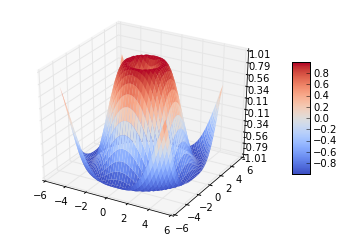

In [16]:
from matplotlib.ticker import LinearLocator, FormatStrFormatter

#We start the figure and add a subplot that has a 3d projection
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

#First we create a X and Y arrays, then a 2D grid of the 2
X = np.arange(-5, 5, 0.25)
Y = np.arange(-5, 5, 0.25)
X, Y = np.meshgrid(X, Y)

#Next We will just make a function that is the Euclidean distance from the origin
#and then feed that function into a sine function so that the z-value and graph color
#varies as a sine wave
R = np.sqrt(X**2 + Y**2)
Z = np.sin(R)

#We plot using the plot_surface function, it has the same construction as
#the previous 3D plotting functions
surf = ax.plot_surface(X, Y, Z, 
                       rstride=1, #Changes the array row step size
                       cstride=1, #Changes the column row step size,
                       cmap=cm.coolwarm, #Sets the colormap
                       linewidth=0) #Changes the linewidth)

#We can set the z-limit in the same manner as the x- and y-limits
ax.set_zlim(-1.01, 1.01)

#We can control the number of ticks and how the tick labels are formatted 
#with the following two functions. 
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

#We add the colorbar using this function, we must give it the original plot
#(so the graph knows what values the colors correspond to)
#The shrink and aspect arguments are to help make the colorbar the same size
#As the rotated z-axis
fig.colorbar(surf, shrink=0.5, aspect=6)